# Cluster Analysis

## Aim

The aim of the analysis is to identify distinct archetypes within the respondents based on their answers.

## The questionnaire consisted of three main questions:
 
1) Whether people noticed any changes to the London mobility landscape (5 options + the negative answer (“no changes noticed”)

    Multiple answers (6 answers in total – 5/6 are considered “pro mobility” answers, 1/6 (‘none of the above’) is considered an “anti-mobility” answer)


2) Whether people support further actions (5 options + the negative answer (“none of the above”)

    Multiple answers (5 answers in total – 4/5 are considered “pro mobility” answers, 1/5 (‘none of the above’) is considered an “anti-mobility” answer)


3) Whether people knew the cities mobility policy (and it was adequate, too slow, too quick) or did not know the policy at all
    
    Single answer (5 possible answers, “other” can be ignored from the analysis

# The Analysis

## Data exploration

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# viewing the first 10 rows
df = pd.read_excel('20210628_London_Mobility_v1.xlsx', sheet_name='Overview_of_data_2', header=2)
df.head(10)

,User ID,Created,Age,Gender,Home location,Device type,Region,Statement on Mobility Policy,Cycle Lanes,Low Traffic,...,"Driving Bans Introduced (""I noticed these changes during COVID"")","Change of PT Schedule (""I noticed these changes during COVID"")","New Modes Added (""I noticed these changes during COVID"")","None of the above (""I noticed these changes during COVID"")",,"New Cycle Lanes (""I support these policies"")","Low Traffic Zones Introduced (""I support these policies"")","Driving Bans Introduced (""I support these policies"")","New Modes Added (""I support these policies"")","None of the above (""I support these policies"")"
0,MqkKEL6Wel91,2021-06-21T20:22:14+00:00,18-20,Female,Greater London,iOS,UK,I know the mobility strategy my city is pursui...,NaN,Introduction of traffic restricted areas (pede...,...,NaN,NaN,NaN,NaN,,NaN,x,NaN,NaN,NaN
1,qVlp98JWL7A5,2021-06-21T20:22:19+00:00,21-24,Male,Greater London,iOS,UK,Other (please comment),Expansion of cycle lanes,NaN,...,NaN,NaN,NaN,NaN,,NaN,NaN,x,x,NaN
2,rYkvNLbKGkmx,2021-06-21T20:22:22+00:00,21-24,Male,Greater London,iOS,UK,I know the mobility strategy my city is pursui...,NaN,Introduction of traffic restricted areas (pede...,...,NaN,NaN,NaN,NaN,,NaN,x,NaN,NaN,NaN
3,0xk2d3195lAw,2021-06-21T20:22:24+00:00,18-20,Female,Greater London,iOS,UK,I know the mobility strategy my city is pursui...,Expansion of cycle lanes,NaN,...,NaN,NaN,NaN,NaN,,NaN,x,NaN,NaN,NaN
4,PLlX23Gvdkpv,2021-06-21T20:22:31+00:00,21-24,Male,Greater London,iOS,UK,I know the mobility strategy my city is pursui...,Expansion of cycle lanes,NaN,...,x,NaN,NaN,NaN,,x,NaN,NaN,NaN,NaN
5,qwneWZ0EZ75r,2021-06-21T20:22:33+00:00,21-24,Male,Greater London,Android,UK,I know the mobility strategy my city is pursui...,Expansion of cycle lanes,Introduction of traffic restricted areas (pede...,...,x,x,NaN,NaN,,x,x,x,NaN,NaN
6,P2nY9P4XEn90,2021-06-21T20:22:36+00:00,21-24,Female,Greater London,iOS,UK,I don't know my city´s mobility strategy suffi...,Expansion of cycle lanes,Introduction of traffic restricted areas (pede...,...,NaN,x,NaN,NaN,,x,NaN,NaN,x,NaN
7,2rlrjyNAal8W,2021-06-21T20:22:37+00:00,21-24,Female,Greater London,iOS,UK,I don't know my city´s mobility strategy suffi...,NaN,NaN,...,NaN,NaN,NaN,x,,NaN,x,NaN,x,NaN
8,XOlEE0edJlgp,2021-06-21T20:22:42+00:00,25-34,Male,Greater London,Android,UK,I know the mobility strategy my city is pursui...,Expansion of cycle lanes,Introduction of traffic restricted areas (pede...,...,x,x,NaN,NaN,,x,x,x,x,NaN
9,Ka76EXG0jlL1,2021-06-21T20:22:42+00:00,35-44,Female,Greater London,iOS,UK,I don't know my city´s mobility strategy suffi...,Expansion of cycle lanes,Introduction of traffic restricted areas (pede...,...,x,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,x


In [3]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   User ID                                                                300 non-null    object 
 1    Created                                                               300 non-null    object 
 2   Age                                                                    299 non-null    object 
 3   Gender                                                                 299 non-null    object 
 4   Home location                                                          299 non-null    object 
 5    Device type                                                           300 non-null    object 
 6    Region                                                                300 non-null    obj

In [4]:
# checking the total number of unique or distinct values of each column present in the dataset

def check_unique_values(column_name):
    print('Column name:',column_name,
        '\nTotal number of unique values:', len(df[column_name].unique()),
          '\nUnique values:\n', df[column_name].unique(),'\n\n\n')
    

    
for column_name, values in df.iteritems():
    check_unique_values(column_name)

Column name: User ID 
Total number of unique values: 301 
Unique values:
 ['MqkKEL6Wel91' 'qVlp98JWL7A5' 'rYkvNLbKGkmx' '0xk2d3195lAw'
 'PLlX23Gvdkpv' 'qwneWZ0EZ75r' 'P2nY9P4XEn90' '2rlrjyNAal8W'
 'XOlEE0edJlgp' 'Ka76EXG0jlL1' 'aOkQbyxmpn4y' 'WJkgoAj0BkPd'
 'JGnJV8wgjnbx' 'qwneWZA5G75r' 'apkDZxbWol3E' '1GnjNxG58nDA'
 'gK7yog0YKnae' 'Ka76EXPPelL1' 'gK7yogBDKnae' 'rYkvNv5Xokmx'
 '4N7MJarAQkjE' 'dKk906x0r7oe' '6KnNVDO55nW2' 'Ka76EXmrNlL1'
 '1GnjNZBNDnDA' 'Zz7bo41vMkgY' 'P2nY9PEYAn90' 'Xgl5952rGl8Q'
 'Bp7P3vGAOl2x' 'aOkQbjMawn4y' 'rYkvNvBDdkmx' 'MjnZ6mBvGnwP'
 'aJnWx25NKlDb' 'WJkgoMV3PkPd' 'PYl83zd5OnW1' '3gkxNREL3lWq'
 '6KnNV8M9bnW2' '6KnNVDmq5nW2' 'Zz7bo4w5jkgY' '4N7MJbZ4WkjE'
 'JGnJV8LWgnbx' 'wNkoZdK047BL' 'P2nY9PbDYn90' 'MJkGKBKELkbx'
 '0xk2d3d6blAw' 'XQnwRj99MkP2' 'XOlEE0Pw3lgp' '4N7MJarXrkjE'
 'rYkvNvYGGkmx' 'p0lOGbdGYl8N' 'aOkQbjvW3n4y' '6KnNVD3RbnW2'
 '2rlrjyqRJl8W' 'PLlX235Oykpv' 'WJkgoA85QkPd' 'GxkVwY55rnbN'
 'qwneWZeXD75r' 'PYl83zvBrnW1' 'RE7LzyRRDn0v' 'Bp7P3rbKql2x'
 'XOlEE0b3J

## Data cleaning and preprocessing

In [5]:

# drop irrelevant columns
df = df.drop(df.columns[[0, 1, 2,3,4,5,6]], axis=1)

df = df.drop(df.columns[ [x for x in range(1,15)] ], axis=1)

df = df.drop(df.columns[ [7] ], axis=1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Statement on Mobility Policy                                           300 non-null    object
 1   New Cycle Lanes ("I noticed these changes during COVID")               168 non-null    object
 2   Low Traffic Zones Introduced ("I noticed these changes during COVID")  117 non-null    object
 3   Driving Bans Introduced ("I noticed these changes during COVID")       69 non-null     object
 4   Change of PT Schedule ("I noticed these changes during COVID")         138 non-null    object
 5   New Modes Added ("I noticed these changes during COVID")               39 non-null     object
 6   None of the above ("I noticed these changes during COVID")             36 non-null     object
 7  

In [6]:
df.head(10)

,Statement on Mobility Policy,"New Cycle Lanes (""I noticed these changes during COVID"")","Low Traffic Zones Introduced (""I noticed these changes during COVID"")","Driving Bans Introduced (""I noticed these changes during COVID"")","Change of PT Schedule (""I noticed these changes during COVID"")","New Modes Added (""I noticed these changes during COVID"")","None of the above (""I noticed these changes during COVID"")","New Cycle Lanes (""I support these policies"")","Low Traffic Zones Introduced (""I support these policies"")","Driving Bans Introduced (""I support these policies"")","New Modes Added (""I support these policies"")","None of the above (""I support these policies"")"
0,I know the mobility strategy my city is pursui...,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
1,Other (please comment),x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN
2,I know the mobility strategy my city is pursui...,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
3,I know the mobility strategy my city is pursui...,x,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
4,I know the mobility strategy my city is pursui...,x,NaN,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN
5,I know the mobility strategy my city is pursui...,x,x,x,x,NaN,NaN,x,x,x,NaN,NaN
6,I don't know my city´s mobility strategy suffi...,x,x,NaN,x,NaN,NaN,x,NaN,NaN,x,NaN
7,I don't know my city´s mobility strategy suffi...,NaN,NaN,NaN,NaN,NaN,x,NaN,x,NaN,x,NaN
8,I know the mobility strategy my city is pursui...,x,x,x,x,NaN,NaN,x,x,x,x,NaN
9,I don't know my city´s mobility strategy suffi...,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x


In [7]:
# converting all nan values to 0
df = df.fillna(0)
df.head(10)

,Statement on Mobility Policy,"New Cycle Lanes (""I noticed these changes during COVID"")","Low Traffic Zones Introduced (""I noticed these changes during COVID"")","Driving Bans Introduced (""I noticed these changes during COVID"")","Change of PT Schedule (""I noticed these changes during COVID"")","New Modes Added (""I noticed these changes during COVID"")","None of the above (""I noticed these changes during COVID"")","New Cycle Lanes (""I support these policies"")","Low Traffic Zones Introduced (""I support these policies"")","Driving Bans Introduced (""I support these policies"")","New Modes Added (""I support these policies"")","None of the above (""I support these policies"")"
0,I know the mobility strategy my city is pursui...,0,x,0,0,0,0,0,x,0,0,0
1,Other (please comment),x,0,0,0,0,0,0,0,x,x,0
2,I know the mobility strategy my city is pursui...,0,x,0,0,0,0,0,x,0,0,0
3,I know the mobility strategy my city is pursui...,x,0,0,0,0,0,0,x,0,0,0
4,I know the mobility strategy my city is pursui...,x,0,x,0,0,0,x,0,0,0,0
5,I know the mobility strategy my city is pursui...,x,x,x,x,0,0,x,x,x,0,0
6,I don't know my city´s mobility strategy suffi...,x,x,0,x,0,0,x,0,0,x,0
7,I don't know my city´s mobility strategy suffi...,0,0,0,0,0,x,0,x,0,x,0
8,I know the mobility strategy my city is pursui...,x,x,x,x,0,0,x,x,x,x,0
9,I don't know my city´s mobility strategy suffi...,x,x,x,0,0,0,0,0,0,0,x


In [8]:
# creating a new df that will contain cleaned and preprocessed data
df_cleaned = pd.DataFrame({})

In [9]:

# encoding the 'Statement on Mobility Policy' from 0 (not in support or I dont know...)
# to 5 (in support and city pace too slow)
mobility_policy_statement = []

for statement in df['Statement on Mobility Policy']:

    if statement == "I don't know my city´s mobility strategy sufficiently enough to have an opinion about it":
        statement_value = 0
    elif statement ==  "I don't know my city´s mobility strategy sufficiently enough to have an opinion about it":
        statement_value = 0
    elif statement == 'Other (please comment)':
        statement_value = 0
    elif statement == 'I know the mobility strategy my city is pursuing; but I do not agree on the direction and measures' :
        statement_value = 1
    elif statement == 'I know the mobility strategy my city is pursuing and think it is right about the speed and direction we need to move':
        statement_value = 3
    elif statement ==  'I know the mobility strategy my city is pursuing and I like the direction; but I think the city is not moving fast enough and should make more “bold moves”':
        statement_value = 5
    mobility_policy_statement.append(statement_value)
        
        
# adding the mobility_policy_statement encoding to the df clean
df_cleaned['Statement on Mobility Policy'] = mobility_policy_statement
df_cleaned.head(10)

,Statement on Mobility Policy
0,3
1,0
2,1
3,3
4,5
5,3
6,0
7,0
8,3
9,0


In [10]:
# replacing all the ticked columns x with 1 in the main df
df = df.iloc[:,0:].replace('x', 1)

# df.info()
df.head(10)

,Statement on Mobility Policy,"New Cycle Lanes (""I noticed these changes during COVID"")","Low Traffic Zones Introduced (""I noticed these changes during COVID"")","Driving Bans Introduced (""I noticed these changes during COVID"")","Change of PT Schedule (""I noticed these changes during COVID"")","New Modes Added (""I noticed these changes during COVID"")","None of the above (""I noticed these changes during COVID"")","New Cycle Lanes (""I support these policies"")","Low Traffic Zones Introduced (""I support these policies"")","Driving Bans Introduced (""I support these policies"")","New Modes Added (""I support these policies"")","None of the above (""I support these policies"")"
0,I know the mobility strategy my city is pursui...,0,1,0,0,0,0,0,1,0,0,0
1,Other (please comment),1,0,0,0,0,0,0,0,1,1,0
2,I know the mobility strategy my city is pursui...,0,1,0,0,0,0,0,1,0,0,0
3,I know the mobility strategy my city is pursui...,1,0,0,0,0,0,0,1,0,0,0
4,I know the mobility strategy my city is pursui...,1,0,1,0,0,0,1,0,0,0,0
5,I know the mobility strategy my city is pursui...,1,1,1,1,0,0,1,1,1,0,0
6,I don't know my city´s mobility strategy suffi...,1,1,0,1,0,0,1,0,0,1,0
7,I don't know my city´s mobility strategy suffi...,0,0,0,0,0,1,0,1,0,1,0
8,I know the mobility strategy my city is pursui...,1,1,1,1,0,0,1,1,1,1,0
9,I don't know my city´s mobility strategy suffi...,1,1,1,0,0,0,0,0,0,0,1


In [11]:
# Grouping the columns into two "I noticed these changes during COVID" and "I support these policies"
# and summing up their subcolumns to be value for respective the two main columns
# Also created an additional column "I noticed these changes during COVID and I support these policies" 
#  


df_cleaned["I noticed these changes during COVID"] = df[list(df.columns[[x for x in range(1,7)]])].sum(axis=1)

df_cleaned["I support these policies"] = df[list(df.columns[[x for x in range(7,12)]])].sum(axis=1)

df_cleaned["I noticed these changes during COVID and I support these policies"] = df[list(df.columns[[x for x in range(1,12)]])].sum(axis=1)




In [12]:
df_cleaned.head(10)

,Statement on Mobility Policy,I noticed these changes during COVID,I support these policies,I noticed these changes during COVID and I support these policies
0,3,1,1,2
1,0,1,2,3
2,1,1,1,2
3,3,1,1,2
4,5,2,1,3
5,3,4,3,7
6,0,3,2,5
7,0,1,2,3
8,3,4,4,8
9,0,3,1,4


## Clustering 

The cleaned dataset ie df_cleaned would be used for the clustering analysis.

The clustering analysis is going to be done in batches, in each batch at least two sets of columns will be selected for analysis.

### Clustering Analysis 1

"Statement on Mobility Policy" VS "I noticed these changes during COVID and I support these policies"

In [13]:
# selecting the columns
X = df_cleaned.iloc[:,[0,-1]]
X.head()


,Statement on Mobility Policy,I noticed these changes during COVID and I support these policies
0,3,2
1,0,3
2,1,2
3,3,2
4,5,3


In [14]:
# selecting the columns
X = df_cleaned.iloc[:,[0,-1]].values

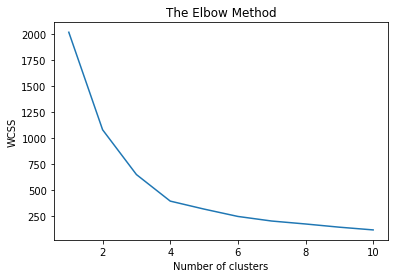

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Optimal_cluster_number.jpeg', format='jpeg', dpi=1200 , bbox_inches='tight')
plt.show()

The optimal number of clusters from the graph is 4, however, 3 clusters will be created as instructed

In [16]:
# Training the Kmeans model on the dataset X
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[2 1 1 2 2 0 0 1 0 1 2 0 0 1 1 1 2 0 1 2 1 1 1 0 1 2 2 0 0 1 2 1 1 0 0 2 2
 0 0 2 2 1 0 0 1 1 1 2 1 1 1 1 2 1 1 1 0 1 1 2 1 2 0 2 0 1 1 1 1 1 1 1 2 2
 1 1 2 2 2 1 0 1 1 2 1 2 0 2 1 1 1 2 2 2 0 1 0 1 1 2 1 1 0 1 1 2 0 1 2 1 1
 1 1 0 2 1 1 1 1 1 1 2 0 1 1 1 0 0 1 0 1 1 2 0 0 2 2 2 1 2 2 0 0 1 1 2 2 1
 2 1 2 2 1 1 1 0 2 1 1 2 0 2 1 1 2 0 1 1 1 0 2 2 1 2 2 2 1 1 2 0 2 2 2 2 2
 1 0 1 0 0 1 2 2 1 1 1 1 1 0 1 2 1 0 0 2 2 2 1 1 2 1 2 1 1 1 0 2 1 0 0 1 2
 0 2 2 2 1 0 0 2 1 2 1 2 2 0 0 1 0 1 1 1 2 1 0 1 0 2 2 2 1 1 1 1 2 2 2 0 0
 1 1 1 1 1 1 2 2 1 1 2 0 2 0 0 1 0 1 1 0 1 1 0 1 2 1 1 1 1 2 0 1 2 1 1 1 0
 2 1 1 0 2]


In [17]:
# The number of values in each cluster 
df_means = pd.DataFrame({})
df_means['kmean'] = kmeans.labels_
df_means['kmean'].value_counts()

1    142
2     93
0     66
Name: kmean, dtype: int64

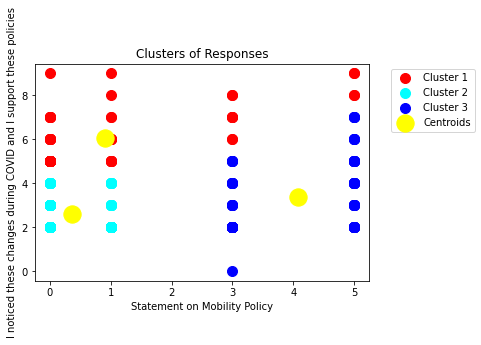

In [18]:
# Visualizing the clusters

# y_kmeans = 0, cluster1
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
# y_kmeans = 1, cluster2
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
# y_kmeans = 2, cluster3
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='blue', label='Cluster 3')
# y_kmeans = 3, cluster4
# plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='green', label='Cluster 4')
# centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label='Centroids')

plt.title('Clusters of Responses')
plt.xlabel('Statement on Mobility Policy')
plt.ylabel('I noticed these changes during COVID and I support these policies')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.savefig('Mobility_vs_Notices_and_Support.jpeg', format='jpeg', dpi=1200 , bbox_inches='tight')
plt.show()

### Clustering Analysis 2

"Statement on Mobility Policy" VS "I noticed these changes during COVID"

In [19]:
# selecting the columns
X = df_cleaned.iloc[:,[0,1]]
X.head()


,Statement on Mobility Policy,I noticed these changes during COVID
0,3,1
1,0,1
2,1,1
3,3,1
4,5,2


In [20]:
# selecting the columns
X = df_cleaned.iloc[:,[0,1]].values

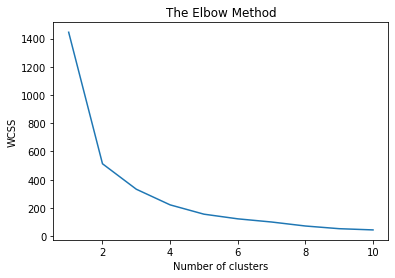

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters from the graph is 4,  however, 3 clusters will be created as instructed.

In [22]:
# Training the Kmeans model on the dataset X
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 2 2 1 1 1 0 2 1 0 1 0 0 2 0 2 1 0 2 1 2 2 2 1 2 1 1 0 1 2 1 2 2 0 0 1 1
 0 0 1 1 2 0 0 2 2 2 1 2 0 2 2 1 0 2 2 1 2 2 1 2 1 2 1 1 2 2 2 2 2 2 0 1 1
 2 2 1 1 1 2 2 2 2 1 2 1 0 1 2 2 2 1 1 1 0 0 0 2 2 1 2 2 0 2 2 1 1 2 1 2 0
 2 2 0 1 2 2 2 2 2 2 1 0 2 2 2 0 0 2 0 2 2 1 0 0 1 1 1 2 1 1 2 0 2 2 1 1 2
 1 2 1 1 2 2 2 0 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 2 1 0 1 1 1 1 1
 2 2 2 0 0 2 1 1 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2 0 1 2 0 0 2 1
 0 1 1 1 2 2 2 1 2 1 2 1 1 0 0 2 0 2 2 2 1 0 2 2 2 1 1 1 2 2 2 2 1 1 1 0 0
 2 2 2 2 2 2 1 1 2 2 1 0 1 0 2 2 2 2 0 2 2 2 0 2 1 2 2 2 2 1 0 2 1 2 2 2 0
 1 2 2 1 1]


In [23]:
# The number of values in each cluster 
df_means = pd.DataFrame({})
df_means['kmean'] = kmeans.labels_
df_means['kmean'].value_counts()

2    147
1    104
0     50
Name: kmean, dtype: int64

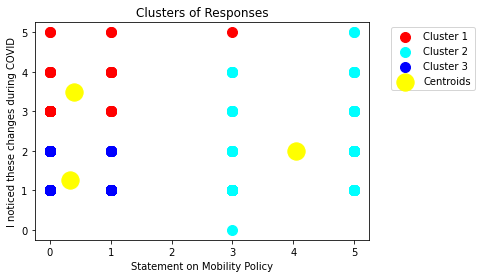

In [24]:
# Visualizing the clusters

# y_kmeans = 0, cluster1
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
# y_kmeans = 1, cluster2
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
# y_kmeans = 2, cluster3
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='blue', label='Cluster 3')
# # y_kmeans = 3, cluster4
# plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='green', label='Cluster 4')
# centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label='Centroids')

plt.title('Clusters of Responses')
plt.xlabel('Statement on Mobility Policy')
plt.ylabel('I noticed these changes during COVID')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.savefig('Mobility_vs_Notices.jpeg', format='jpeg', dpi=1200,  bbox_inches='tight' )
plt.show()

### Clustering Analysis 3

"Statement on Mobility Policy" VS "I support these policies"

In [25]:
# selecting the columns
X = df_cleaned.iloc[:,[0,2]]
X.head()


,Statement on Mobility Policy,I support these policies
0,3,1
1,0,2
2,1,1
3,3,1
4,5,1


In [26]:
# selecting the columns
X = df_cleaned.iloc[:,[0,2]].values

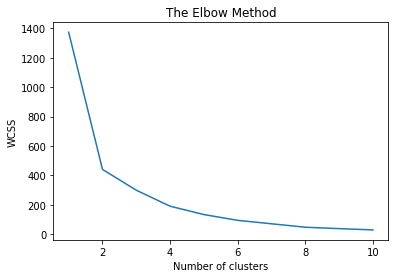

In [27]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters from the graph is 3, and 3 clusters will be created.

In [28]:
# Training the Kmeans model on the dataset X
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 0 0 1 1 1 0 0 1 0 1 2 2 0 0 0 1 2 0 1 0 0 0 1 0 1 1 2 1 0 1 0 0 0 2 1 1
 2 0 1 1 0 0 2 2 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 2 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 2 2 0 1 0 1 1 1 0 0 0 1 1 1 0 0 2 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 2 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 2 1 0 0 1 1 0 0 0 2 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 0 2 0 2 2 0 1 1 0 0 0 0 0 1 0 1 0 1 2 1 1 1 0 0 1 0 1 2 0 0 0 1 0 0 2 2 1
 0 1 1 1 0 2 2 1 0 1 0 1 1 0 0 0 2 0 0 0 1 0 2 0 2 1 1 1 0 0 0 0 1 1 1 0 2
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 2 0 2 0 0 2 0 0 2 0 1 0 0 0 0 1 2 0 1 0 0 0 0
 1 0 0 1 1]


In [29]:
# The number of values in each cluster 
df_means = pd.DataFrame({})
df_means['kmean'] = kmeans.labels_
df_means['kmean'].value_counts()

0    163
1    105
2     33
Name: kmean, dtype: int64

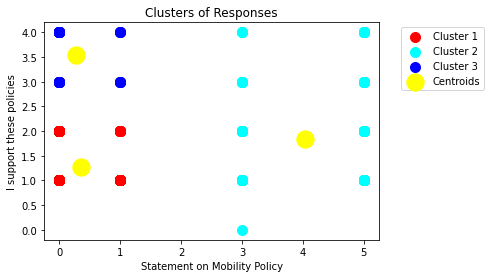

In [30]:
# Visualizing the clusters

# y_kmeans = 0, cluster1
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
# y_kmeans = 1, cluster2
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
# y_kmeans = 2, cluster3
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='blue', label='Cluster 3')
# y_kmeans = 3, cluster4
# plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='green', label='Cluster 4')
# centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label='Centroids')

plt.title('Clusters of Responses')
plt.xlabel('Statement on Mobility Policy')
plt.ylabel('I support these policies')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.savefig('Mobility_vs_Support.jpeg', format='jpeg', dpi=1200,  bbox_inches='tight')
plt.show()

### Clustering Analysis 4

'I noticed these changes during COVID' VS "I support these policies"

In [31]:
# selecting the columns
X = df_cleaned.iloc[:,[1,2]]
X.head()


,I noticed these changes during COVID,I support these policies
0,1,1
1,1,2
2,1,1
3,1,1
4,2,1


In [32]:
# selecting the columns
X = df_cleaned.iloc[:,[1,2]].values

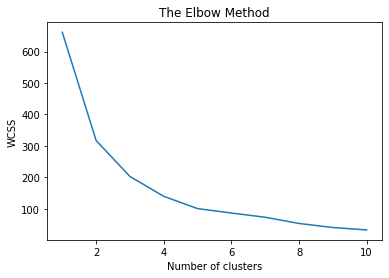

In [33]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters from the graph is 3,  and 3 clusters will be created.

In [34]:
# Training the Kmeans model on the dataset X
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 1 1 1 1 0 0 1 0 0 1 0 2 1 0 1 2 0 1 2 1 1 1 0 1 0 1 0 2 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 0 2 1 1 2 1 0 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 0 2 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 2 0 1 1 1 0 0 1 0 1 1 1 0 0 1 2 0 1 1 0 2 0 1 1 0 0 1
 2 1 0 1 1 1 1 0 1 1 1 1 2 0 1 1 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0 0 1 1 1 2 0
 1 2 1 2 0 1 1 1 1 1 1 1 1 2 1 1 1 0 2 2 1 0 1 1 1 1 1 2 1 1 0 2 1 0 0 2 1
 0 1 1 1 1 2 2 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 2 1 2 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 2 1 1 1 0 1 0 2 1 2 1 0 2 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 0
 0 1 1 0 1]


In [35]:
# The number of values in each cluster 
df_means = pd.DataFrame({})
df_means['kmean'] = kmeans.labels_
df_means['kmean'].value_counts()

1    193
0     72
2     36
Name: kmean, dtype: int64

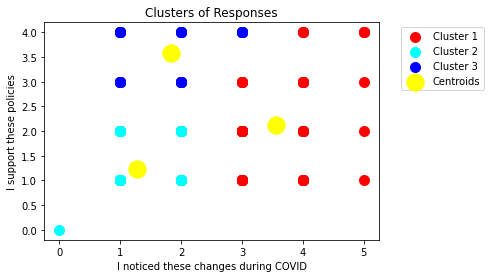

In [36]:
# Visualizing the clusters

# y_kmeans = 0, cluster1
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
# y_kmeans = 1, cluster2
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
# y_kmeans = 2, cluster3
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='blue', label='Cluster 3')
# y_kmeans = 3, cluster4
# plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='green', label='Cluster 4')
# centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label='Centroids')

plt.title('Clusters of Responses')
plt.xlabel('I noticed these changes during COVID')
plt.ylabel('I support these policies')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.savefig('Notices_vs_Support.jpeg',format='jpeg', dpi=1200,  bbox_inches='tight')
plt.show()

### Clustering Analysis 5

'Statement on Mobility Policy' VS 'I noticed these changes during COVID' VS "I support these policies"

In [37]:
# selecting the columns
X = df_cleaned.iloc[:,[0,1,2,]]
X.head()

,Statement on Mobility Policy,I noticed these changes during COVID,I support these policies
0,3,1,1
1,0,1,2
2,1,1,1
3,3,1,1
4,5,2,1


In [38]:
# selecting the columns
X = df_cleaned.iloc[:,[0,1,2,]].values

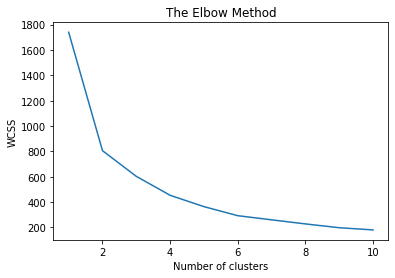

In [39]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters from the graph is 4,  however, 3 clusters will be created as instructed.

In [40]:
# Training the Kmeans model on the dataset X
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 0 0 1 1 1 2 0 2 2 1 2 2 0 2 0 1 2 0 1 0 0 0 1 0 1 1 2 1 0 1 0 0 2 2 1 1
 2 2 1 1 0 2 2 0 0 0 1 0 2 0 0 1 2 0 0 1 0 0 1 0 1 2 1 1 0 0 0 0 0 0 2 1 1
 0 0 1 1 1 0 0 0 0 1 0 1 2 1 0 0 0 1 1 1 2 2 2 0 0 1 0 0 2 0 0 1 1 0 1 0 2
 0 0 2 1 0 0 0 0 0 0 1 2 0 0 0 2 2 0 2 0 0 1 2 2 1 1 1 0 1 1 2 2 0 0 1 1 0
 1 0 1 1 0 0 0 2 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 2 1 1 1 1 1
 0 0 0 2 2 0 1 1 0 0 0 0 0 1 0 1 0 1 2 1 1 1 0 0 1 0 1 0 0 0 2 1 0 2 2 0 1
 2 1 1 1 0 0 2 1 0 1 0 1 1 2 2 0 2 0 0 0 1 2 2 0 2 1 1 1 0 0 0 0 1 1 1 2 2
 0 0 0 0 0 0 1 1 0 0 1 2 1 2 2 0 0 0 2 0 0 0 2 0 1 0 0 0 0 1 2 0 1 0 0 0 2
 1 0 0 1 1]


In [41]:
# The number of values in each cluster 
df_means = pd.DataFrame({})
df_means['kmean'] = kmeans.labels_
df_means['kmean'].value_counts()

0    140
1    103
2     58
Name: kmean, dtype: int64

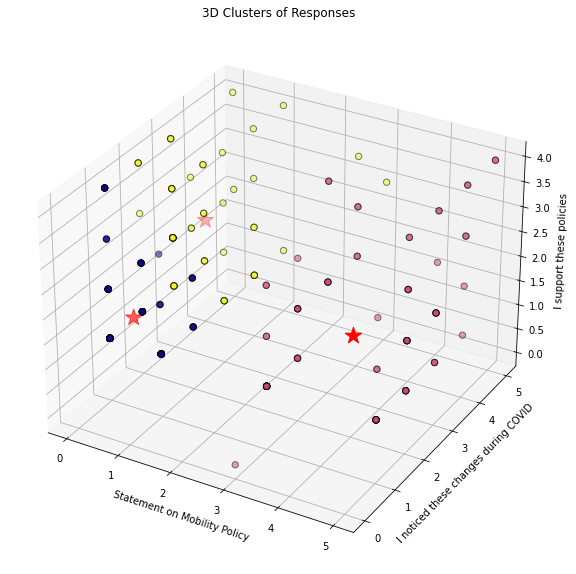

In [42]:
# visualizing the clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], X[:,2], c=y_kmeans, cmap='plasma',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("3D Clusters of Responses")
ax.set_xlabel("Statement on Mobility Policy")
ax.set_ylabel("I noticed these changes during COVID")
ax.set_zlabel("I support these policies")
ax.dist = 10


# centroid of each cluster
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], 
           s = 300, c='r',marker='*', label='Centroids')

# ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], 
#            s = 300, c='r',marker='*', label='Centroids')


plt.autoscale(enable=True, axis='x', tight=True)    

plt.savefig('Mobility_vs_Notices_vs_Support.jpeg',format='jpeg', dpi=1200,  bbox_inches='tight')
plt.show()
